In [1]:
# Importing dependencies

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import utils
import seaborn as sns

# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import cross_val_score
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier

In [2]:
# Calling all csv files related to organ and survival rate 

survival_by_type= pd.read_csv('machine_learning_resources/survival_donor_type_df.csv')
survival_by_age= pd.read_csv('machine_learning_resources/survival_age_df.csv')
survival_by_diagnoses= pd.read_csv('machine_learning_resources/survival_donor_type_df.csv')
cPRA_scores= pd.read_csv('machine_learning_resources/clean_cPRA.csv').drop(columns=['Med. Center', 'Unnamed: 0'])

med_centers= pd.read_csv('machine_learning_resources/latLong.csv').drop(columns=['All Centers Hospital Name', 'Address', 'Unnamed: 5',
                                                      'lat/long', 'Hospital Name'])
# med_centers.head()
# survival_by_age.head()
# cPRA_scores.head()
# survival_by_type.head()
# survival_by_diagnoses.head()


# survival_by_type.Organ.unique()
# print(len(med_centers))
# print(len(survival_by_diagnoses))
# print(len(survival_by_age))


In [3]:
# Merging, joining, and filtering data for final combined DataFrame

survival_df= pd.merge(survival_by_age, survival_by_diagnoses, on='Organ', how='inner')
survival_df
joined_df= survival_df.join(cPRA_scores)
# joined_df

filtered_df= joined_df.drop(columns= ['_id_x', 'Region_x','_id_y', 'Region_y'])
filtered_df
filtered_df['Years_Post_Transplant_x'] = filtered_df['Years_Post_Transplant_x'].str.replace(r'Year', '').astype(float)
filtered_df['Years_Post_Transplant_y'] = filtered_df['Years_Post_Transplant_y'].str.replace(r'Year', '').astype(float)
# filtered_df.Organ.unique()
main_df= filtered_df.copy()
main_df=main_df.dropna()
main_df.head()



print(len(main_df))


270


In [84]:
# Renaming columns and finding the averages and sums for certain columns to condense. 

main_df['Survival Rate'] =  main_df[['Survival_Rate_x', 'Survival_Rate_y']].mean(axis=1)
main_df['Years Post Transplant'] = main_df[['Years_Post_Transplant_y', 'Years_Post_Transplant_x']].mean(axis=1)
main_df['Number Functioning or Alive'] = main_df["Number_Functioning_or_Alive_y"] + main_df["Number_Functioning_or_Alive_x"]


final_df= main_df.drop(columns=['Survival_Rate_y', 'Survival_Rate_x', 'Number_Functioning_or_Alive_x', 
                          'Number_Functioning_or_Alive_y','Years_Post_Transplant_x', 'Years_Post_Transplant_y'])

# final_df
clean_df = final_df.join(med_centers).dropna()
# joined_df= final_df.join(med_centers)
# final_df['Med. Center'] = final_df["All Centers"]
# clean_df= joined_df.drop(columns=['All Centers']).dropna()
clean_df

# print(len(final_df))
# final_df= main_df.join(med_centers) 

,Organ,Recipient_Age,Donor_Type,cPRA Range,Kidney,Liver,Pancreas,Kidney / Pancreas,Heart,Survival Rate,Years Post Transplant,Number Functioning or Alive,State Abv,All Centers
0,Kidney,1-5 Years,Cadaveric,0,9,0,0,0,0,94.20,1.0,43004,AL,ALAM-TX1
1,Kidney,1-5 Years,Living,20-79,1,0,0,0,0,96.35,1.0,22358,AL,ALCH-TX1
2,Kidney,1-5 Years,Cadaveric,98-100,5,0,0,0,0,90.15,2.0,36053,AL,ALUA-TX1
3,Kidney,1-5 Years,Living,0,622,0,3,7,0,93.85,2.0,21260,AL,ALVA-TX1
4,Kidney,1-5 Years,Cadaveric,1-19,46,0,0,0,0,84.80,3.0,29261,AR,ARBH-TX1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,Liver,65 +,Living,98-100,26,0,0,1,0,76.95,3.0,2745,PR,PRSJ-TX1
266,Liver,65 +,Cadaveric,0,338,0,0,1,0,72.95,4.0,20629,RI,RIRH-TX1
267,Liver,65 +,Living,1-19,211,0,2,1,0,73.95,4.0,2571,SC,SCCH-TX1
268,Liver,65 +,Cadaveric,20-79,466,0,0,5,0,68.90,5.0,18273,SC,SCMU-TX1


<AxesSubplot:ylabel='Frequency'>

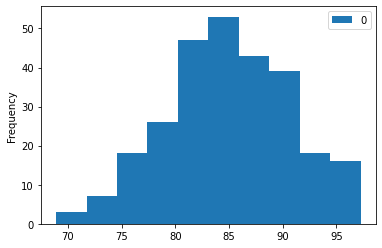

In [85]:
X= clean_df.drop(columns='Survival Rate')
y= pd.DataFrame(clean_df['Survival Rate'].values.reshape(-1,1))
# y.columns["Avg. Survival Rate"]

y.plot.hist()

In [87]:
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import StandardScaler



In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
print(X_test.shape, y_test.shape)

# y_train
X_train.head()

(90, 13) (90, 1)


,Organ,Recipient_Age,Donor_Type,cPRA Range,Kidney,Liver,Pancreas,Kidney / Pancreas,Heart,Years Post Transplant,Number Functioning or Alive,State Abv,All Centers
229,Liver,1-5 Years,Living,80-97,3,0,0,0,0,3.0,1657,OH,OHTC-TX1
257,Liver,35-49 Years,Living,1-19,520,0,0,1,0,5.0,3753,PA,PARH-TX1
260,Liver,50-64 Years,Cadaveric,98-100,156,0,2,4,0,4.0,28656,PA,PATU-TX1
210,Liver,50-64 Years,Cadaveric,98-100,44,0,0,0,0,2.0,33759,NY,NYMA-TX1
193,Liver,11-17 Years,Living,20-79,46,0,0,0,0,2.0,1385,NJ,NJLL-TX1


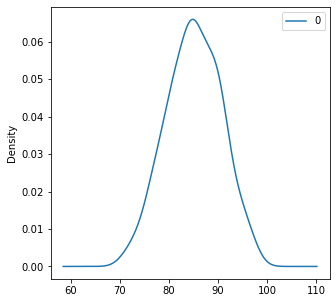

In [88]:
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(111)
y_train.plot(kind='density', subplots=True, ax=ax)

plt.show()


In [9]:
# fig = plt.figure(figsize = (8,8))
# ax = fig.add_subplot(111)
# X_train.hist(ax=ax)
# plt.show()

In [45]:
# X_train_copy= X_train.copy()
# X_test_copy= X_test.copy()

# columns= X_train_copy.columns

# scaler=StandardScaler()
# # rfr= RandomForestRegressor()


# scaler.fit(X_train_copy)
# X_train_scaled=scaler.transform(X_train_copy)
# X_test_scaled=scaler.transform(X_test_copy)


# # rfr.fit(X_train_copy, y_train)
# # print(fit_model.score(X_train_scaled, y_train))
# # print(fit_model.score(X_test_scaled, y_test))

# X_train_scaled_features= pd.DataFrame(X_train_scaled, index=X_train_copy.index, columns= columns)
# X_test_scaled_features= pd.DataFrame(X_test_scaled, index=X_test_copy.index, columns= columns)



# # X_train_copy
# X_train_scaled_features.head()

In [90]:
# example of making a single class prediction
# from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

X_train_dummies = pd.get_dummies(X_train)


# # fit final model
model = LinearRegression()
model.fit(X_train_dummies, y_train)

print(f'Score of the LinearRegression model: {model.score(X_train_dummies, y_train)}')
print(f'The models intercept: {model.intercept_}')

# # print(model.coef_)
# X_train.head()

Score of the LinearRegression model: 1.0
The models intercept: [90.28844439]


In [91]:
# Assessing performance of LinearRegression model

from sklearn.model_selection import KFold

scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X_train_dummies, y_train)):
 model.fit(X_train_dummies.iloc[train,:], y_train.iloc[train,:])
 score = model.score(X_train_dummies.iloc[test,:], y_train.iloc[test,:])
 scores.append(score)

print(f"KFold performance scores: {scores}")

KFold performance scores: [0.9098841157994559, 0.927083811977436, 0.9526684920446528]


In [95]:
y_prediction = pd.DataFrame(model.predict(X_train_dummies))
y_test= pd.DataFrame(y_train)

prediction_and_actual= pd.concat([y_train, y_prediction], axis=1).dropna()
prediction_and_actual.columns= ['Actual', 'Predicted']
# y_predicted_df = pd.DataFrame(({"Actual": [y_train], 
#                                "Predicted":[y_prediction]}))
# y_predicted_df
prediction_and_actual.head()


# print(len(y_test))
# print(len(y_pred))

,0
0,83.450000
1,75.678392
2,75.450000
3,82.939691
4,88.000000


R^2 score: 0.98
MAE score: 0.34
EVS score: 0.98


[Text(0.5, 0, 'Y Test Score'), Text(0, 0.5, 'Y Prediction Score')]

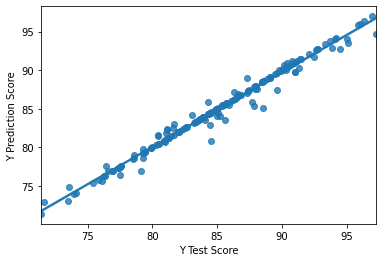

In [93]:
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error

# Measures how well model will be able to predict future values
print(f'R^2 score: {r2_score(y_true=y_test, y_pred=y_prediction):.2f}')

# How much predicted value can deviate from the the real value. 
# The higher the metric, the higher the deviation from true value.
print(f'MAE score: {mean_absolute_error(y_true=y_test, y_pred=y_prediction):.2f}')

# EVS is metric for calculating the ratio between variance of error and variance of true values. 
# This score measures how well model can explain variations in dataset.
print(f'EVS score: {explained_variance_score(y_true=y_test, y_pred=y_prediction):.2f}')

line_plot = sns.regplot(x=y_test, y=y_prediction)
line_plot.set(xlabel='Y Test Score', ylabel='Y Prediction Score')

In [94]:
import pickle
# from sklearn import model_selection

with open ('survival_rate_model_xgboost.pkl', 'wb') as file:
    pickle.dump(model, file)


# filename= 'finalized_model.pkl'
# with open(filename, 'wb') as file:
#     pickle.dump(model, file)
    
# with open(filename, 'rb') as file:
#     pickle_model= pickle.load(file)

In [224]:
X_test_dummies= pd.get_dummies(X_test)
X_test_dummies.head()
print(X_test_dummies.shape)
print(y_test.shape)

(114, 259)
(231, 1)


In [225]:
# score= pickle_model.score(X_test_dummies, y_test)

In [177]:
# loaded_model= pickle.load(open(filename, 'rb'))
# result= loaded_model.score(X_test, y_test)
# # print(result)